# Hate Narratives and the Nagorno-Karabakh Conflict, 2020-2024

This summer, I spent six weeks in the South Caucasus conducting research on civil society-led peacebuilding initiatives in Armenia, in the particular context of the decades-long Nagorno-Karabakh conflict between Armenia and Azerbaijan. I was based in Yerevan, Armenia's capital, but also spent several days in Baku, the capital of Azerbaijan. Throughout my time there, I was perpetually struck by the hateful rhetoric used by both political leaders and regular people on both sides of the conflict. At times it was downright appalling - I recall watching a recent video of an elderly Azerbaijani woman, in the aftermath of an Armenian strike, crying, "We thirst for every last drop of Armenian blood. We thirst for their children's blood."

Such hateful speech has become an integral dimension of the conflict, especially as actual contact between Armenians and Azerbaijanis, which has in many cases facilitated mutual understanding, increasingly vanishes. I was struck when an Armenian colleague at the Yerevan think tank I worked with over the summer told me that she'd only met one Azerbaijani in her life, when she lived in Russia in her youth. She added that if she had an opportunity in the future to speak with someone from Azerbaijan, she wouldn't take it. This was coming from somebody I deeply admired for her intellectual curiosity and openmindedness, and someone who had been involved to varying degrees in peacebuilding efforts before. If someone with her position and pedigree was completely uninterested in building bridges, what hope was there to promote reconciliation - especially when travel by Armenians to Azerbaijan, and even their presence in the other country, and vice versa has effectively been banned? My colleague never used bombastic, hateful speech, but there was always a sense of disdain, and that Armenians had been deeply, indelibly wronged by the Azerbaijanis.

One can, though, often hear hateful, dehumanizing rhetoric emanating from the top offices in both countries. In my experience, Ilham Aliyev, the president of Azerbaijan since 2003, is the bigger culprit, but Armenia's Nikol Pashinyan, prime minister since 2018, is guilty of weaponizing such speech as well. I'm interested in investigating how Aliyev and Pashinyan use hate narratives, when and to what end they use them, and their historical roots, among other things. Borrowing from Iwona Jakubowska-Branicka (2016), hate narratives are patterns of speech or communication that promote hostility, discrimination, or violence against a particular group, often based on their ethnicity, religion, nationality, gender, or other traits. Hate narratives often involve stereotyping, dehumanization, or the justification of harm toward the targeted group. **My primary research question is as follows: How do the speeches of Nikol Pashinyan and Ilham Aliyev between 2020 and 2024 reflect and propagate hate narratives, and what differences or similarities exist in their rhetorical strategies?**

While the conflict began in 1988 as the Soviet Union began to crumble, my focus is on the past four years, and especially on four particularly pivotal events: the Second Nagorno-Karabakh War, which lasted from late September to early November 2020; September 2022 clashes between Armenia and Azerbaijan which included the largest attacks by Azerbaijan on Armenia proper in the history of the conflict; the Azerbaijani blockade of the Lachin corridor, the only road connecting Armenia and Nagorno-Karabakh, which began in December 2022; and the one-day lightning offensive launched by Azerbaijan in September 2023, giving it complete control of Nagorno-Karabakh for the first time and leading to the exodus of nearly all Armenians from the territory and into mainland Armenia.

My analysis includes speeches by Pashinyan and Aliyev before, during, and after these events. In total, it includes 48 speeches by Pashinyan and 36 by Aliyev, scraped from their official websites. All the speeches are available in English on the sites. More precisely, it includes 16 Pashinyan speeches and 11 Aliyev speeches around the Second Nagorno-Karabakh War; six Pashinyan and eight Aliyev speeches around the September 2022 clashes; 12 Pashinyan and seven Aliyev speeches around the Lachin corridor blockade; and 14 Pashinyan and 10 Aliyev speeches around the 2023 lightning offensive.

First, it's always helpful to get a mental picture of where something is taking place, so let's generate a map.

***Generating a map of Armenia, Azerbaijan, and Nagorno-Karabakh***

In [2]:
!pip install folium

  Using cached branca-0.8.0-py3-none-any.whl.metadata (1.5 kB)
Using cached branca-0.8.0-py3-none-any.whl (25 kB)


In [49]:
"""I wanted to create a map of Armenia and Azerbaijan and also show Nagorno-Karabakh, the rough borders of which aren't
usually shown on most maps. If you click on the pins on the map, it'll show you which entity is which."""

import folium #For creating interactive maps
import json #To handle GeoJSON data, a file format for geographic data, in this case to add the Nagorno-Karabakh border to the map
from IPython.display import IFrame #To display the map directly in the notebook

#Specifying the path to my local GeoJSON file, which I found for Nagorno-Karabakh on GitHub.
#It's got the blue border on the map below.
geojson_file_path = r"C:\Users\wolyn\Downloads\nagorno-karabakh.geojson"

#Opening and loading the GeoJSON data from the local file
with open(geojson_file_path, 'r') as f:
    geojson_data = json.load(f)

#Initializing the map centered around a latitude and longitude, got these with help from ChatGPT
m = folium.Map(location=[40.2, 45.3], zoom_start=7) #zoom_start determines the starting zoom level

#Displaying the geographic data on the map
folium.GeoJson(geojson_data).add_to(m)

#Adding markers with labels for Armenia, Azerbaijan, and Nagorno-Karabakh
#Coordinates for approximate locations of these regions
folium.Marker([40.2, 44.5], popup="Armenia").add_to(m)
folium.Marker([40.2, 47.5], popup="Azerbaijan").add_to(m)
folium.Marker([39.9, 46.8], popup="Nagorno-Karabakh").add_to(m)

#Saving the map to an HTML file
m.save("nagorno_karabakh_map_with_labels.html")

#Displaying the map in the notebook
IFrame("nagorno_karabakh_map_with_labels.html", width=800, height=600)

***Collecting and cleaning the data***

Now that we can easily visualize this part of the world, I need to actually collect the speeches for my analysis. I went to the respective websites for Aliyev and Pashinyan and gathered the URLs for each relevant speech around the four events in question. I'm creating two CSV files, one for Aliyev's speeches and one for Pashinyan's, to keep it simple in my mind/analysis.

In [4]:
import requests #To fetch webpage content
import csv #To write extracted data into a CSV file
from bs4 import BeautifulSoup #To parse and extract data from HTML

#List of web links to Pashinyan's speeches to be scraped
urls = [
    "https://www.primeminister.am/en/statements-and-messages/item/2020/08/21/Nikol-Pashinyan-Security-Council-meeting/",
"https://www.primeminister.am/en/statements-and-messages/item/2020/08/28/Nikol-Pashinyan--message/",
"https://www.primeminister.am/en/statements-and-messages/item/2020/09/27/Nikol-Pashinyan-message/",
"https://www.primeminister.am/en/statements-and-messages/item/2020/09/27/Nikol-Pashinyan-Speech/",
"https://www.primeminister.am/en/statements-and-messages/item/2020/09/27/Cabinet-meeting-Speech-27-09/",
"https://www.primeminister.am/en/statements-and-messages/item/2020/10/03/Nikol-Pashinyan-message/",
"https://www.primeminister.am/en/statements-and-messages/item/2020/10/14/Nikol-Pashinyan-message-to-the-nation/",
"https://www.primeminister.am/en/statements-and-messages/item/2020/10/21/Nikol-Pashinyan/",
"https://www.primeminister.am/en/statements-and-messages/item/2020/10/27/Nikol-Pashinyan-Speech/",
"https://www.primeminister.am/en/statements-and-messages/item/2020/11/12/Nikol-Pashinyan-Speech/",
"https://www.primeminister.am/en/statements-and-messages/item/2020/11/26/Nikol-Pashinyan-Speech/",
"https://www.primeminister.am/en/statements-and-messages/item/2020/11/27/Cabinet-meeting-Speech/",
"https://www.primeminister.am/en/statements-and-messages/item/2020/12/02/Nikol-Pashinyan-Speech-CSTO-session/",
"https://www.primeminister.am/en/statements-and-messages/item/2020/12/05/Nikol-Pashinyan-message/",
"https://www.primeminister.am/en/statements-and-messages/item/2020/12/14/Nikol-Pashinyan-Speech/",
"https://www.primeminister.am/en/statements-and-messages/item/2020/12/19/Nikol-Pashinyan-message/",
"https://www.primeminister.am/en/statements-and-messages/item/2022/08/04/Cabinet-meeting-Speech/",
"https://www.primeminister.am/en/statements-and-messages/item/2022/09/02/Nikol-Pashinyan-messages/",
"https://www.primeminister.am/en/statements-and-messages/item/2022/09/13/Nikol-Pashinyan-Speech/",
"https://www.primeminister.am/en/statements-and-messages/item/2022/09/19/Nikol-Pashinyan-Speech/",
"https://www.primeminister.am/en/statements-and-messages/item/2022/09/22/Nikol-Pashinyan-Speech/",
"https://www.primeminister.am/en/statements-and-messages/item/2022/10/14/Nikol-Pashinyan-Speech/#photos[pp_gal_1]/0/",
"https://www.primeminister.am/en/statements-and-messages/item/2022/11/10/Cabinet-meeting-Speech/",
"https://www.primeminister.am/en/statements-and-messages/item/2022/11/23/Nikol-Pashinyan-CSTO-meeting/",
"https://www.primeminister.am/en/statements-and-messages/item/2022/12/15/Cabinet-meeting-Speech/",
"https://www.primeminister.am/en/statements-and-messages/item/2022/12/22/Cabinet-meeting-Speech/",
"https://www.primeminister.am/en/statements-and-messages/item/2022/12/29/Cabinet-meeting-Speech/",
"https://www.primeminister.am/en/statements-and-messages/item/2022/12/31/Nikol-Pashinyan-New-Year-Message/",
"https://www.primeminister.am/en/statements-and-messages/item/2023/02/16/Cabinet-meeting-Speech/",
"https://www.primeminister.am/en/statements-and-messages/item/2023/02/20/Nikol-Pashinyan-Congratulations/",
"https://www.primeminister.am/en/statements-and-messages/item/2023/02/23/Cabinet-meeting-Speech/",
"https://www.primeminister.am/en/statements-and-messages/item/2023/03/09/Cabinet-meeting-Speech/",
"https://www.primeminister.am/en/statements-and-messages/item/2023/03/16/Cabinet-meeting-Speech/",
"https://www.primeminister.am/en/statements-and-messages/item/2023/03/23/Cabinet-meeting-Speech/",
"https://www.primeminister.am/en/statements-and-messages/item/2023/08/17/Cabinet-meeting-Speech/",
"https://www.primeminister.am/en/statements-and-messages/item/2023/08/24/Cabinet-meeting-Speech/",
"https://www.primeminister.am/en/statements-and-messages/item/2023/09/02/Nikol-Pashinyan-message/",
"https://www.primeminister.am/en/statements-and-messages/item/2023/09/07/Cabinet-meeting-Speech/",
"https://www.primeminister.am/en/statements-and-messages/item/2023/09/14/Cabinet-meeting-Speech/",
"https://www.primeminister.am/en/statements-and-messages/item/2023/09/19/Nikol-Pashinyan-Speech/",
"https://www.primeminister.am/en/statements-and-messages/item/2023/09/20/Nikol-Pashinyan-Speech/",
"https://www.primeminister.am/en/statements-and-messages/item/2023/09/21/Nikol-Pashinyan-21-09-Speech/",
"https://www.primeminister.am/en/statements-and-messages/item/2023/09/22/Cabinet-meeting-Speech/",
"https://www.primeminister.am/en/statements-and-messages/item/2023/09/24/Nikol-Pashinyan-messages/",
"https://www.primeminister.am/en/statements-and-messages/item/2023/09/28/Cabinet-meeting-Speech/",
"https://www.primeminister.am/en/statements-and-messages/item/2023/10/17/Nikol-Pashinyan-Speech/",
"https://www.primeminister.am/en/statements-and-messages/item/2023/10/26/Nikol-Pashinyan-Speech/#photos[pp_gal_1]/0/",
"https://www.primeminister.am/en/statements-and-messages/item/2023/11/18/Nikol-Pashinyan-Speech/"
]

#Name of the file to store the scraped speeches
csv_file = 'pashinyan_speeches48.csv'

#Looping through the URLs to process each speech webpage
for url in urls:
    try:
        response = requests.get(url) #Retrieving the page
        response.raise_for_status() #Ensuring the request is successful
        soup = BeautifulSoup(response.text, 'html.parser') #Parses the HTML structure of the page

        #Finding the speech text (in all <p> tags)
        paragraphs = soup.find_all('p')
        speech_text = "\n".join([p.get_text() for p in paragraphs]) #Combining the text into a single string

        #Extracting the date
        date = soup.find('div', class_='search__date fs12')  #Locates the date using a specific class, had to manually inspect the page to get the right class
        date_text = date.get_text(strip=True) if date else "Date not found"

        #Categorizing the leader for this CSV, not super necessary since this one is only for Pashinyan but helpful in my mind
        leader = "Pashinyan"

        #Opening the CSV file and writing speech data
        with open(csv_file, mode='a', newline='', encoding='utf-8') as file:
            writer = csv.writer(file)

            #Making sure to write the header only once
            if file.tell() == 0:  #Check if the file is empty to write a header
                writer.writerow(["Leader", "Date", "Speech Text", "URL"])

            # Write the speech data
            writer.writerow([leader, date_text, speech_text, url]) #Writes leader name, date, speech, and URL as a row

        print(f"Successfully scraped: {url}")

    except Exception as e:
        print(f"Failed to scrape {url}: {e}")

Successfully scraped: https://www.primeminister.am/en/statements-and-messages/item/2020/08/21/Nikol-Pashinyan-Security-Council-meeting/
Successfully scraped: https://www.primeminister.am/en/statements-and-messages/item/2020/08/28/Nikol-Pashinyan--message/
Successfully scraped: https://www.primeminister.am/en/statements-and-messages/item/2020/09/27/Nikol-Pashinyan-message/
Successfully scraped: https://www.primeminister.am/en/statements-and-messages/item/2020/09/27/Nikol-Pashinyan-Speech/
Successfully scraped: https://www.primeminister.am/en/statements-and-messages/item/2020/09/27/Cabinet-meeting-Speech-27-09/
Successfully scraped: https://www.primeminister.am/en/statements-and-messages/item/2020/10/03/Nikol-Pashinyan-message/
Successfully scraped: https://www.primeminister.am/en/statements-and-messages/item/2020/10/14/Nikol-Pashinyan-message-to-the-nation/
Successfully scraped: https://www.primeminister.am/en/statements-and-messages/item/2020/10/21/Nikol-Pashinyan/
Successfully scraped

Now my Pashinyan CSV file has been created, and I want to go in and add a column for "Event" so each speech clearly corresponds to one of the four events I'm looking at. Then I want to see the data I'm working with, using Pandas.

In [4]:
import pandas as pd

df_p = pd.read_csv(r"C:\Users\wolyn\OneDrive\Documents\Yale - Fall 2024\Python for Global Affairs\pashinyan_speeches48.csv")
print(df_p.head())  #Viewing the first few rows

      Leader        Date       Event  \
0  Pashinyan  21.08.2020  2nd NK War   
1  Pashinyan  28.08.2020  2nd NK War   
2  Pashinyan  27.09.2020  2nd NK War   
3  Pashinyan  27.09.2020  2nd NK War   
4  Pashinyan  27.09.2020  2nd NK War   

                                         Speech Text  \
0  more 12 photos\nA regular session of the Secur...   
1  more 36 photos\nAn award ceremony for the Tavu...   
2  Dear compatriots,\r\nProud citizens of the Rep...   
3  more 9 photos\nDear president of the National ...   
4  Honorable National Assembly President,\r\nDist...   

                                                 URL  
0  https://www.primeminister.am/en/statements-and...  
1  https://www.primeminister.am/en/statements-and...  
2  https://www.primeminister.am/en/statements-and...  
3  https://www.primeminister.am/en/statements-and...  
4  https://www.primeminister.am/en/statements-and...  


Looks like there are some unnecessary characters like the \n, so I want to take care of those. I also want to make sure the date column is in datetime format for easier analysis.

In [5]:
df_p['Date'] = pd.to_datetime(df_p['Date'], format='%d.%m.%Y')
print(df_p.dtypes) #Date should now show datetime64[ns]

Leader                 object
Date           datetime64[ns]
Event                  object
Speech Text            object
URL                    object
dtype: object


In [6]:
#Applying the text cleaning
df_p['Speech Text'] = df_p['Speech Text'].str.replace(r'\n', ' ', regex=True)  #Removing newline characters here
df_p['Speech Text'] = df_p['Speech Text'].str.replace(r'\s+', ' ', regex=True)  #Replacing multiple spaces with a single space
df_p['Speech Text'] = df_p['Speech Text'].str.strip()  #Removing leading and trailing spaces

#Let's check out what we have now
print(df_p.head())

      Leader       Date       Event  \
0  Pashinyan 2020-08-21  2nd NK War   
1  Pashinyan 2020-08-28  2nd NK War   
2  Pashinyan 2020-09-27  2nd NK War   
3  Pashinyan 2020-09-27  2nd NK War   
4  Pashinyan 2020-09-27  2nd NK War   

                                         Speech Text  \
0  more 12 photos A regular session of the Securi...   
1  more 36 photos An award ceremony for the Tavus...   
2  Dear compatriots, Proud citizens of the Republ...   
3  more 9 photos Dear president of the National A...   
4  Honorable National Assembly President, Disting...   

                                                 URL  
0  https://www.primeminister.am/en/statements-and...  
1  https://www.primeminister.am/en/statements-and...  
2  https://www.primeminister.am/en/statements-and...  
3  https://www.primeminister.am/en/statements-and...  
4  https://www.primeminister.am/en/statements-and...  


Now I want to normalize the speech text and do tokenization at the word level.

In [7]:
import re

def normalize_and_tokenize(text):
    """This is a function to normalize and tokenize"""
    #Converting to lowercase
    text = text.lower()
    #Removing punctuation
    text = re.sub(r'[^\w\s]', '', text)
    #Tokenizing into words
    tokens = text.split()
    return tokens

#Applying the function to my DataFrame
df_p['Tokens'] = df_p['Speech Text'].apply(normalize_and_tokenize)

#Displaying updated DataFrame to check
print(df_p[['Speech Text', 'Tokens']].head())

                                         Speech Text  \
0  more 12 photos A regular session of the Securi...   
1  more 36 photos An award ceremony for the Tavus...   
2  Dear compatriots, Proud citizens of the Republ...   
3  more 9 photos Dear president of the National A...   
4  Honorable National Assembly President, Disting...   

                                              Tokens  
0  [more, 12, photos, a, regular, session, of, th...  
1  [more, 36, photos, an, award, ceremony, for, t...  
2  [dear, compatriots, proud, citizens, of, the, ...  
3  [more, 9, photos, dear, president, of, the, na...  
4  [honorable, national, assembly, president, dis...  


Lastly, I just want to see a full speech to make sure everything looks acceptable.

In [9]:
print(df_p['Speech Text'].iloc[5]) #Picking a random row/speech

Dear people, Proud citizens of the Republic of Armenia, Proud citizens of the Artsakh Republic, Proud Diaspora Armenians, For almost a week now, the Armenian nation in Artsakh and in Armenia has been resisting the terrorist offensive unleashed by Azerbaijan and Turkey. The scale of the offensive is unprecedented: the enemy is attacking with such a scale that according to military experts has not happened very often during the 21st century in any corner of the world or any of the conflict zones. Hundreds of tanks, armored vehicles, thousands of missiles, several dozen airplanes, hundreds of UAVs, and tens of thousands of infantry are targeting the military units of the Artsakh Defense Army along the Line of Contact for almost a week now. Our analysis has shown that between 150 to 200 Azerbaijani soldiers are attacking a single military unit of the Artsakh Defense Army. And such attacks are repeated several times during the day, accompanied by missiles, artillery, armored vehicles, aircr

I'll take it. Now I've got a workable CSV with all 48 Pashinyan speeches. I'll move on to Aliyev's speeches. I tried the same approach with his, but I ran into a bunch of errors I think stemming from a slightly different website setup, so bit of a different approach here.

In [46]:
import requests #To fetch webpage content
import csv #To write extracted data into a CSV file
from bs4 import BeautifulSoup #To parse and extract data from HTML

#List of web links to Aliyev's speeches to be scraped
urls = [
    "https://president.az/en/articles/view/39951",
"https://president.az/en/articles/view/40267",
"https://president.az/en/articles/view/42798",
"https://president.az/en/articles/view/42794",
"https://president.az/en/articles/view/42459",
"https://president.az/en/articles/view/42108",
"https://president.az/en/articles/view/44371",
"https://president.az/en/articles/view/48793",
"https://president.az/en/articles/view/49937",
"https://president.az/en/articles/view/49953",
"https://president.az/en/articles/view/50226",
"https://president.az/en/articles/view/56550",
"https://president.az/en/articles/view/56987",
"https://president.az/en/articles/view/57277",
"https://president.az/en/articles/view/57276",
"https://president.az/en/articles/view/58559",
"https://president.az/en/articles/view/58557",
"https://president.az/en/articles/view/57564",
"https://president.az/en/articles/view/57748",
"https://president.az/en/articles/view/57857",
"https://president.az/en/articles/view/57856",
"https://president.az/en/articles/view/58470",
"https://president.az/en/articles/view/59164",
"https://president.az/en/articles/view/59195",
"https://president.az/en/articles/view/63447",
"https://president.az/en/articles/view/60430",
"https://president.az/en/articles/view/60990",
"https://president.az/en/articles/view/61113",
"https://president.az/en/articles/view/61532",
"https://president.az/en/articles/view/61664",
"https://president.az/en/articles/view/62244",
"https://president.az/en/articles/view/62209",
"https://president.az/en/articles/view/62336",
"https://president.az/en/articles/view/62864",
"https://president.az/en/articles/view/64527",
"https://president.az/en/articles/view/64830"
]

def scrape_speech(url):
    """This is a function to extract content from the webpages"""
    response = requests.get(url) #Scraping a URL, retrieving the page content
    soup = BeautifulSoup(response.content, 'html.parser') #This converts the webpage into a navigable BeautifulSoup object
    
    #Extracting the date
    date = soup.find('span', class_='news_date') #Again, had to inspect the webpage to find the right class
    date = date.text.strip() if date else 'No date found'
    
    #Extracting the speech text; combining text from <p> tags within the proper news_paragraph-block class
    speech_text = ' '.join([p.text.strip() for p in soup.find_all('p') if p.find_parent(class_='news_paragraph-block')]) #Also had to inspect here to get the right class for the speech text
    if not speech_text:
        speech_text = 'No speech text found'

    return {
        'Date': date,
        'Speech Text': speech_text,
        'URL': url
    } #Returns a dictionary with the above elements

#Scraping the speeches
speech_data = [] #Initializing an empty list to store the scraped data
for url in urls: #Looping through the URLs and appending results to the list
    speech_data.append(scrape_speech(url))

#Creating a DataFrame from the scraped data
df = pd.DataFrame(speech_data)

#Saving the data to a CSV file
df.to_csv('aliyev_speeches36.csv', index=False)

As with the Pashinyan speeches, I also want to see what I have here. And again, I want to manually add an "Event" column, including (as for Pashinyan) "2nd NK War", "Border clashes", "Lachin blockade", and "Lightning offensive".

In [47]:
df_a = pd.read_csv(r"C:\Users\wolyn\OneDrive\Documents\Yale - Fall 2024\Python for Global Affairs\aliyev_speeches36.csv")
print(df_a.head())  #Viewing the first few rows

   Leader                      Date       Event  \
0  Aliyev       21 July 2020, 14:45  2nd NK War   
1  Aliyev       29 July 2020, 15:30  2nd NK War   
2  Aliyev  21 September 2020, 19:30  2nd NK War   
3  Aliyev  24 September 2020, 23:55  2nd NK War   
4  Aliyev  27 September 2020, 14:00  2nd NK War   

                                         Speech Text  \
0  - Dear friends, it is a very significant day i...   
1  It is a very remarkable day in the life of Bal...   
2  Mr. President, Mr. Secretary-General, The Repu...   
3  Mr. President, Mr. Secretary-General, Distingu...   
4  As you know, early this morning, Armenian arme...   

                                           URL  
0  https://president.az/en/articles/view/39951  
1  https://president.az/en/articles/view/40267  
2  https://president.az/en/articles/view/42798  
3  https://president.az/en/articles/view/42794  
4  https://president.az/en/articles/view/42459  


In [12]:
#Convert to datetime and get rid of the time part here, which Pashinyan's didn't have
df_a['Date'] = pd.to_datetime(df_a['Date'], format='%d %B %Y, %H:%M').dt.date

In [10]:
print(df_a.head()) #Looks good

   Leader                      Date       Event  \
0  Aliyev       21 July 2020, 14:45  2nd NK War   
1  Aliyev       29 July 2020, 15:30  2nd NK War   
2  Aliyev  21 September 2020, 19:30  2nd NK War   
3  Aliyev  24 September 2020, 23:55  2nd NK War   
4  Aliyev  27 September 2020, 14:00  2nd NK War   

                                         Speech Text  \
0  - Dear friends, it is a very significant day i...   
1  It is a very remarkable day in the life of Bal...   
2  Mr. President, Mr. Secretary-General, The Repu...   
3  Mr. President, Mr. Secretary-General, Distingu...   
4  As you know, early this morning, Armenian arme...   

                                           URL  
0  https://president.az/en/articles/view/39951  
1  https://president.az/en/articles/view/40267  
2  https://president.az/en/articles/view/42798  
3  https://president.az/en/articles/view/42794  
4  https://president.az/en/articles/view/42459  


Normalizing and tokenizing for Aliyev's speeches now.

In [48]:
import re

def normalize_and_tokenize(text):
    """This is a function to normalize and tokenize"""
    #Converting to lowercase
    text = text.lower()
    #Removing punctuation
    text = re.sub(r'[^\w\s]', '', text)
    #Tokenizing into words
    tokens = text.split()
    return tokens

#Applying the function to my DataFrame
df_a['Tokens'] = df_a['Speech Text'].apply(normalize_and_tokenize)

#Displaying updated DataFrame to check
print(df_a[['Speech Text', 'Tokens']].head())

                                         Speech Text  \
0  - Dear friends, it is a very significant day i...   
1  It is a very remarkable day in the life of Bal...   
2  Mr. President, Mr. Secretary-General, The Repu...   
3  Mr. President, Mr. Secretary-General, Distingu...   
4  As you know, early this morning, Armenian arme...   

                                              Tokens  
0  [dear, friends, it, is, a, very, significant, ...  
1  [it, is, a, very, remarkable, day, in, the, li...  
2  [mr, president, mr, secretarygeneral, the, rep...  
3  [mr, president, mr, secretarygeneral, distingu...  
4  [as, you, know, early, this, morning, armenian...  


In [12]:
#Let's see a full speech just to make sure it looks OK
print(df_a['Speech Text'].iloc[17]) #Picking a random row/speech

Distinguished President of Kazakhstan, Kassym-Jomart Tokayev, Distinguished Heads of State and Government, Ladies and gentlemen, First of all, I would like to thank the President of Kazakhstan, Kassym-Jomart Tokayev, for his invitation to the 6th CICA Summit and for his hospitality. During President Tokayev’s recent successful official visit to Azerbaijan, we had fruitful discussions on current issues of the bilateral agenda. Azerbaijan supports the political and socio-economic reforms in Kazakhstan under the leadership of President Tokayev. Dear colleagues, As a result of the victory gained in the Second Karabakh war two years ago, Azerbaijan liberated its territories from the occupation of Armenia, put an end to the three-decades-long Karabakh conflict, ensured justice and itself, enforced the implementation of the 4 UN Security Council resolutions adopted in 1993, demanding unconditional withdrawal of Armenian armed forces from Azerbaijan’s occupied territories. Our cities and villa

Everything looks alright to me. Now I have two DataFrames to work with and analyze, one each for Pashinyan and Aliyev.

***Sentiment Analysis***

I'm gonna start with a sentiment analysis to try to quantify and compare the tone of the speeches. I'll use TextBlob.

In [16]:
!pip install textblob nltk

  Using cached textblob-0.18.0.post0-py3-none-any.whl.metadata (4.5 kB)
Using cached textblob-0.18.0.post0-py3-none-any.whl (626 kB)


In [13]:
from textblob import TextBlob

def calculate_sentiment(text):
    """This is a function to calculate sentiment"""
    blob = TextBlob(text)
    return blob.sentiment.polarity  #Gives me a polarity score: -1 (negative) to +1 (positive)

#Applying sentiment analysis to both DataFrames
df_p['Sentiment'] = df_p['Speech Text'].apply(calculate_sentiment)
df_a['Sentiment'] = df_a['Speech Text'].apply(calculate_sentiment)

#Displaying sample results
print(df_p[['Speech Text', 'Sentiment']].head())
print(df_a[['Speech Text', 'Sentiment']].head())

                                         Speech Text  Sentiment
0  more 12 photos A regular session of the Securi...   0.023150
1  more 36 photos An award ceremony for the Tavus...   0.119753
2  Dear compatriots, Proud citizens of the Republ...   0.094766
3  more 9 photos Dear president of the National A...   0.123917
4  Honorable National Assembly President, Disting...   0.090904
                                         Speech Text  Sentiment
0  - Dear friends, it is a very significant day i...   0.111081
1  It is a very remarkable day in the life of Bal...   0.116718
2  Mr. President, Mr. Secretary-General, The Repu...   0.077165
3  Mr. President, Mr. Secretary-General, Distingu...   0.042526
4  As you know, early this morning, Armenian arme...   0.119941


Now I want to visualize changes in sentiment over time. I also want to easily see when each important event occurred, so I'm adding labels for each (incl. start and end date for the Second Nagorno-Karabakh War).

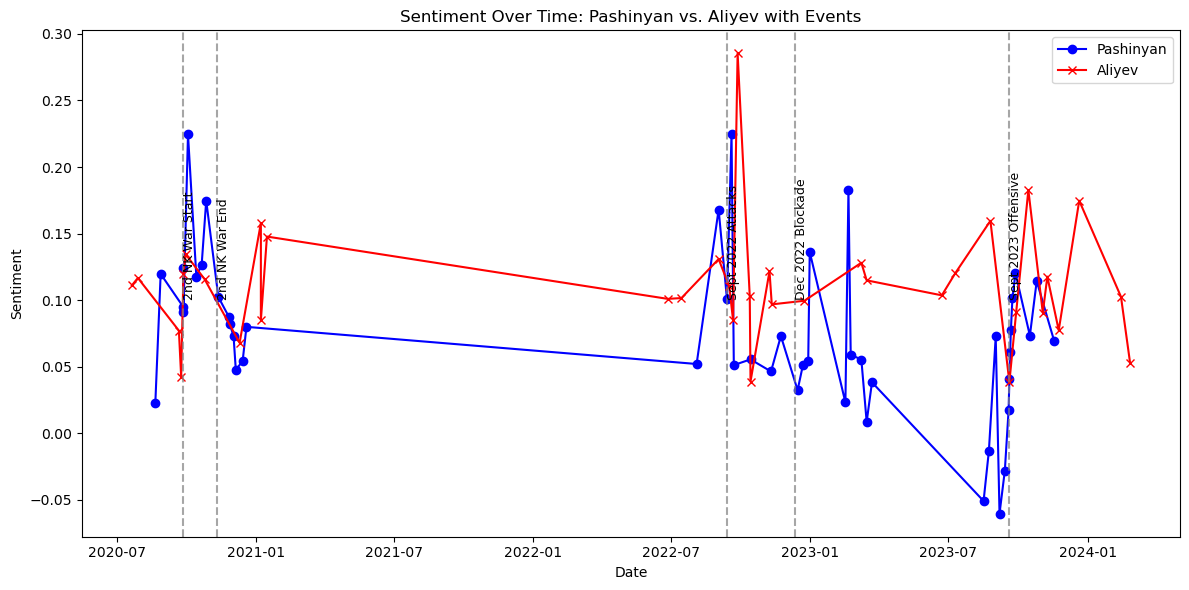

In [36]:
import matplotlib.pyplot as plt

#Sorting by date
df_p.sort_values('Date', inplace=True)
df_a.sort_values('Date', inplace=True)

#Defining my key events and their dates
events = {
    "2nd NK War Start": "2020-09-27",
    "2nd NK War End": "2020-11-10",
    "Sept 2022 Attacks": "2022-09-13",
    "Dec 2022 Blockade": "2022-12-12",
    "Sept 2023 Offensive": "2023-09-19"
}

#Converting event dates to datetime
event_dates = {event: pd.to_datetime(date) for event, date in events.items()}

#Plotting sentiment for both leaders
plt.figure(figsize=(12, 6))
plt.plot(df_p['Date'], df_p['Sentiment'], label='Pashinyan', marker='o', color='blue')
plt.plot(df_a['Date'], df_a['Sentiment'], label='Aliyev', marker='x', color='red')

#Adding labels for events
for event, date in event_dates.items():
    plt.axvline(x=date, color='gray', linestyle='--', alpha=0.7)  #Vertical lines for my key events
    plt.text(date, 0.1, event, rotation=90, verticalalignment='bottom', fontsize=9, color='black')  #Text labels

#Adding plot details here
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.title('Sentiment Over Time: Pashinyan vs. Aliyev with Events')
plt.legend()
plt.tight_layout()

plt.show()

I also want to get some summary stats for sentiment, including mean sentiment for each leader.

In [32]:
#Calculating mean sentiment for Pashinyan
pashinyan_mean_sentiment = df_p['Sentiment'].mean()

#Calculating mean sentiment for Aliyev
aliyev_mean_sentiment = df_a['Sentiment'].mean()

#Summary statistics for both leaders
pashinyan_stats = df_p['Sentiment'].describe()
aliyev_stats = df_a['Sentiment'].describe()

#Printing results
print("Pashinyan Mean Sentiment:", pashinyan_mean_sentiment)
print("Aliyev Mean Sentiment:", aliyev_mean_sentiment)
print("\nPashinyan Sentiment Statistics:")
print(pashinyan_stats)
print("\nAliyev Sentiment Statistics:")
print(aliyev_stats)

Pashinyan Mean Sentiment: 0.07570565232488291
Aliyev Mean Sentiment: 0.11127758263759155

Pashinyan Sentiment Statistics:
count    48.000000
mean      0.075706
std       0.060064
min      -0.060344
25%       0.047327
50%       0.072939
75%       0.105401
max       0.224946
Name: Sentiment, dtype: float64

Aliyev Sentiment Statistics:
count    36.000000
mean      0.111278
std       0.045575
min       0.038475
25%       0.089207
50%       0.107019
75%       0.123330
max       0.285398
Name: Sentiment, dtype: float64


Firstly, it looks like the average sentiment for Aliyev's speeches over this time period is slightly higher than that of Pashinyan's speeches, which makes sense. Azerbaijan was the clear victor across these stages of the conflict, winning on the battlefield over nearly all the events and eventually taking over Nagorno-Karabakh completely. It's interesting that Pashinyan's mean sentiment is in the positive range, considering Armenia, obviously, was the clear loser and lost control of what it sees as some of its historical homeland. Much of this can be chalked up to Pashinyan's opting to strike a tone of resilience and optimism in many of his speeches. For example, this excerpt from his Nov. 12, 2020 speech, just after the end of the 2nd NK War, illustrates this point: "Many may whether we can talk about a good future after such a disastrous war. Yes, because today there are countries that have suffered the most severe capitulations in the 20th century, but today are among the most powerful nations in the world. They did so after a brutal defeat, with an emphasis on the development of education, science, industry and democracy, and this should be our next step. And I urge all of us to focus on what we can do to strengthen our country. This will be our best service to the memory of our martyrs, our wounded and disabled servicemen, their relatives, families, mothers, fathers, wives, and children." Clearly, Pashinyan here is trying to maintain a sense of hope and looking forward to a brighter future.

A couple of things jump out to me from the line graph. Pashinyan's most positive speech came right after the start of the 2nd NK War. Here's a bit of it: "Victory and only victory is the ending that we see at the end of this struggle. Today, a few hours ago, the Artsakh Defense Army launched a powerful counteroffensive and recorded significant advances and destroyed several special units of Azerbaijan. No matter how many mercenaries have been deployed over there: the Azerbaijani side cannot compete with the Armenian will to win and live. With joint efforts we will break the adversary's backbone, so that it could never raise its murderous hands on us, so that its bloody gaze could never fall upon our people...This is a new Sardarapat, and we all should be prepared to devote ourselves to a single mission that we call final victory. Each of us must be ready to be on the forefront of that victory. We will win! We are sure to win! Rest assured that victory will be on our side!" At this point in the war, there were indeed a few positive developments for the Armenian side, but more than anything this speech serves as a rallying cry, a way for Pashinyan to inject a sense of purpose and victory into his people. It was looking like it might become a protracted conflict at this point, so Pashinyan was trying to motivate and inspire the Armenian forces and people, and ready them for a potentially long war. After this point, things went clearly south for Armenia on the battlefield, and you can see that reflected in the sentiment of Pashinyan's ensuing speeches.

Not surprisingly, Aliyev's speeches were clearly more positive than Pashinyan's after the conclusion of the 2nd NK War. Azerbaijan won and claimed quite a bit of territory. We then see Aliyev at his most positive after the September 2022 border clashes, which tracks - the Azerbaijani attacks struck across a wide swath of Armenia proper, the largest such offensive on mainland Armenia in the entire history of the conflict. Armenia put up little resistance, and the international community hardly batted an eye, so Aliyev had to be feeling pretty good: "Our Victory march started in this direction as we broke through the enemy's first line of defense. For 44 days, the Azerbaijan Army moved forward every single day. Every day, without stopping, without pausing, tirelessly, we went forward, shedding blood and giving martyrs, but advancing towards Victory. We didn't stop even for a day. We didn't step back even for a day but went forward, chasing the enemy on the battlefield and winning the historic Victory."

Lastly, we can see that Pashinyan was at his most negative in the lead up to Azerbaijan's 2023 lightning offensive and takeover of NK. You can clearly feel a sense of despair in this Sep. 7, 2023 speech as Azerbaijan built up its forces at the front lines: "In the past week, the military-political situation in our region significantly worsened. The reason is that Azerbaijan has been accumulating troops for days along the Nagorno Karabakh contact line and the Armenia-Azerbaijan border. The rhetoric of anti-Armenian hatred has intensified in the Azerbaijani press and propaganda platforms. The policy of encroachment on the sovereign territory of Armenia continues." Interestingly, Pashinyan's rhetoric grows slightly more positive after the Azerbaijani offensive, again most probably to strike that tone of resilience and optimism, looking forward to (hopefully) less bleak times.

***Rhetorical Strategy Analysis***

Now I want to take a deeper dive into Pashinyan's and Aliyev's rhetorical strategies and use of hate narratives/speech. I'll clean my data up a little bit more, lemmatizing each token and removing stopwords.

In [19]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

#Initializing lemmatizer and stopwords list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def lemmatize_and_remove_stopwords(tokens):
    """This is a function for lemmatization and stopword removal"""
    return [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

#Applying the function to my DataFrames
df_a['Cleaned Tokens'] = df_a['Tokens'].apply(lemmatize_and_remove_stopwords)
df_p['Cleaned Tokens'] = df_p['Tokens'].apply(lemmatize_and_remove_stopwords)

#Checking the results
df_a['Cleaned Tokens'].head(), df_p['Cleaned Tokens'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wolyn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wolyn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


(0    [dear, friend, significant, day, life, today, ...
 1    [remarkable, day, life, balakan, district, tod...
 2    [president, republic, azerbaijan, elected, cha...
 3    [president, distinguished, head, state, govern...
 4    [know, early, morning, armenian, armed, force,...
 Name: Cleaned Tokens, dtype: object,
 0    [12, photo, regular, session, security, counci...
 1    [36, photo, award, ceremony, tavush, victoriou...
 2    [dear, compatriot, proud, citizen, republic, a...
 3    [9, photo, dear, president, national, assembly...
 4    [honorable, national, assembly, president, dis...
 Name: Cleaned Tokens, dtype: object)

First I want to get a sense of how often each leader uses the "hate words" below. Since I have 48 Pashinyan speeches and 36 Aliyev speeches and the speeches are of varying lengths, I'll try to calculate the rates at which they use hate words, e.g. hate words per 300 words, rather than calculate absolute counts.

           Aliyev Hate Words per 300 Words  Pashinyan Hate Words per 300 Words
Leader                                                                        
Aliyev                            1.932178                                 NaN
Pashinyan                              NaN                             0.72563


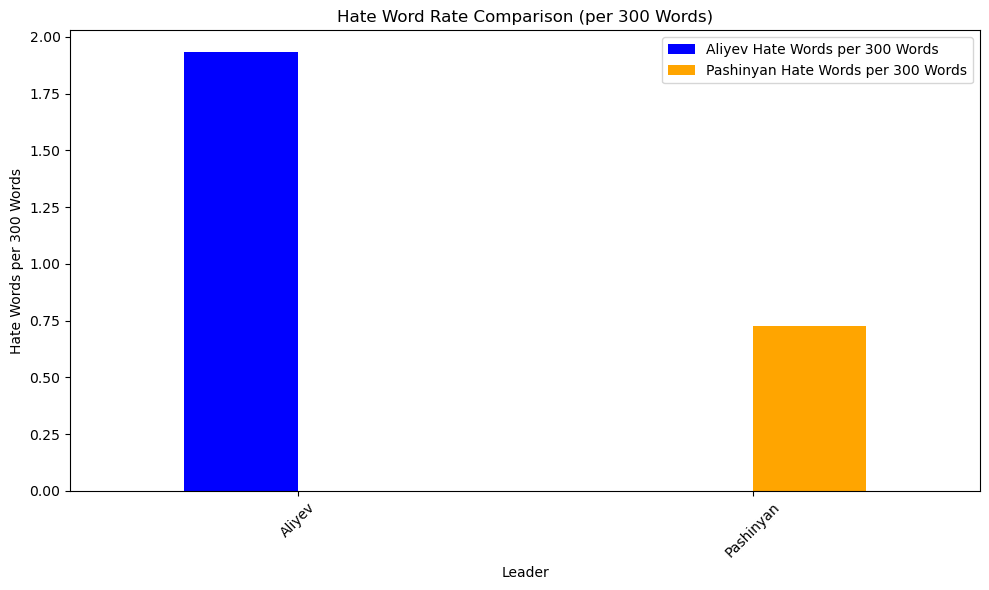

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

#Defining my list of hate words
hate_words = [
    'occupier', 'separatist', 'vandal', 'brutal', 'war crime', 'terrorist', 
    'enemy', 'invader', 'aggressor', 'oppressor', 'invading', 'raider', 
    'murderer', 'barbarian', 'butcher', 'killer', 'enemy combatant', 'assailant', 
    'tyrant', 'invincible enemy', 'subjugator', 'invading force', 'perpetrator', 
    'invader', 'enemy state', 'savage', 'bloodthirsty', 'warmonger', 'criminal', 
    'oppressive regime', 'fanatic', 'extremist', 'marauder', 'terroristic', 
    'hate-filled', 'despotic', 'destructive force', 'inhuman', 'barbaric', 
    'enemy forces', 'unjust', 'murderous', 'brutality', 'mass murderer', 
    'hated enemy', 'dehumanizer', 'horrific', 'ruthless', 'vicious', 'fascist', 
    'war criminal', 'destroyer', 'merciless', 'unforgiving', 'demon', 'fiend', 
    'savage beast', 'horrible enemy', 'bloodthirsty murderer', 'monstrous', 
    'despised', 'exterminator', 'subjugator', 'cruel', 'barbarous', 'threatening', 
    'predator', 'sickening', 'heartless', 'mercenary', 'destructive', 'warlord', 
    'fanatical', 'murderous regime', 'oppressed', 'violent extremist', 
    'vile', 'sadistic', 'inhumane', 'terror', 'carnage', 'scourge', 'war monger', 
    'invading army', 'plunderer', 'human rights violator', 'terrorist state', 
    'violator', 'criminal regime', 'genocidal', 'bloodthirsty tyrant', 
    'dystopian', 'unworthy enemy', 'violent enemy', 'subversive', 'thug', 'vile enemy'
]

def count_hate_words(tokens, hate_words):
    """This is a function to count hate words in a speech"""
    return sum(1 for word in tokens if word in hate_words)

def count_words(tokens):
    """This is a function to count total words in a speech"""
    return len(tokens)

def calculate_hate_word_rate_300(df, hate_words):
    """This is a function to calculate the rate of hate words per 300 words"""
    #Counting the number of hate words in each speech
    df['Hate Word Count'] = df['Tokens'].apply(lambda tokens: count_hate_words(tokens, hate_words))
    
    #Counting the total number of words in each speech
    df['Total Word Count'] = df['Tokens'].apply(lambda tokens: count_words(tokens))
    
    #Calculating the rate of hate words per 300 words
    df['Hate Words per 300 Words'] = (df['Hate Word Count'] / df['Total Word Count']) * 300
    
    #Grouping by leader and calculating the average rates
    leader_rate_per_300_words = df.groupby('Leader')['Hate Words per 300 Words'].mean()
    
    return leader_rate_per_300_words

#Calculating rates for both Aliyev and Pashinyan
aliyev_rate_per_300_words = calculate_hate_word_rate_300(df_a, hate_words)
pashinyan_rate_per_300_words = calculate_hate_word_rate_300(df_p, hate_words)

#Combining the results into a single DataFrame for comparison
rate_comparison_300 = pd.DataFrame({
    'Aliyev Hate Words per 300 Words': aliyev_rate_per_300_words,
    'Pashinyan Hate Words per 300 Words': pashinyan_rate_per_300_words
})

#Printing the results
print(rate_comparison_300)

#Visualization of the rate per 300 words
rate_comparison_300.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'])
plt.title('Hate Word Rate Comparison (per 300 Words)')
plt.ylabel('Hate Words per 300 Words')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Now this is interesting, and it tracks with my personal impressions hearing from both leaders. It looks like Aliyev uses hate words about 2.5 times as often as Pashinyan, which is a pretty significant difference. Of course, Pashinyan still uses them fairly often, so he isn't blameless either. Now I want to see which hate words each leader uses the most, and how this changes over time.

Top 10 hate words for Aliyev:
enemy: 98
occupier: 23
criminal: 21
terror: 15
terrorist: 13
separatist: 10
aggressor: 9
invader: 8
horrific: 7
savage: 6


Top 10 hate words for Pashinyan:
enemy: 20
terrorist: 16
mercenary: 9
criminal: 6
genocidal: 5
invading: 4
threatening: 3
cruel: 3
destructive: 2
murderous: 1




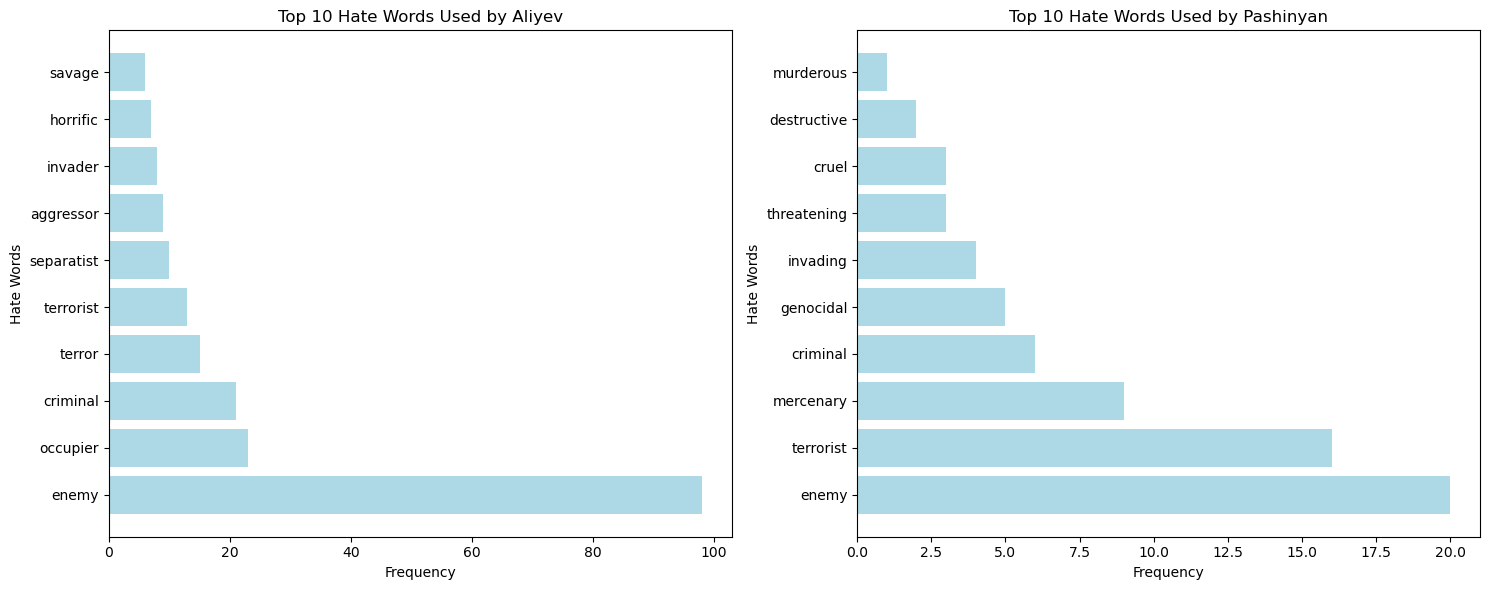

In [30]:
def count_hate_words(tokens):
    """This is a function to count hate words in speech tokens"""
    return {word: tokens.count(word) for word in hate_words if word in tokens}

def calculate_top_hate_words(df):
    """This is a function to calculate the top hate words used by each leader"""
    #Initialize dictionary to store results for each leader
    leader_top_words = {}

    #Iterating over each leader's speeches
    for leader in df['Leader'].unique():
        leader_df = df[df['Leader'] == leader]
        word_counts = {}

        #Counting hate words for each speech
        for tokens in leader_df['Tokens']:
            hate_word_counts = count_hate_words(tokens)
            for word, count in hate_word_counts.items():
                if word not in word_counts:
                    word_counts[word] = count
                else:
                    word_counts[word] += count

        #Sorting by frequency and getting top 10 words
        sorted_word_counts = sorted(word_counts.items(), key=lambda item: item[1], reverse=True)
        leader_top_words[leader] = sorted_word_counts[:10]

    return leader_top_words

#Getting the top 10 hate words for each leader
top_hate_words = calculate_top_hate_words(pd.concat([df_a, df_p]))

#Displaying the top hate words for each leader
for leader, words in top_hate_words.items():
    print(f"Top 10 hate words for {leader}:")
    for word, count in words:
        print(f"{word}: {count}")
    print("\n")

#Visualization of the top hate words for both leaders
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for i, (leader, words) in enumerate(top_hate_words.items()):
    word_list, count_list = zip(*words)
    axes[i].barh(word_list, count_list, color='lightblue')
    axes[i].set_title(f"Top 10 Hate Words Used by {leader}")
    axes[i].set_xlabel('Frequency')
    axes[i].set_ylabel('Hate Words')

plt.tight_layout()
plt.show()

"Enemy" is the winner for both Aliyev and Pashinyan. In a close second for Pashinyan is "terrorist", which could be explained by the way the Christian Armenians view the Muslim Azerbaijanis, as well as the purported presence of Syrian and Turkish mercenary "terrorists" in the conflict. Also revealing that Pashinyan uses the term "genocidal" relatively frequently. He often accuses the Aliyev regime of perpetrating ethnic cleansing and genocide in Nagorno-Karabakh, shades of which can be seen in Aliyev's speeches when, for example, he erases the Armenian identity of Karabakh Armenians by referring to them as "Western Azerbaijanis". Also interesting is Aliyev's use of the word "separatist", which implies that the Karabakh Armenians are merely Azerbaijanis fighting to break away from the rest of Azerbaijan, and that Nagorno-Karabakh is indeed Azerbaijan. Lastly, that both Aliyev and Pashinyan use variations of "invade" relatively frequently speaks to how they view the region. Obviously the Armenians see the Azerbaijani forces as invading Nagorno-Karabakh, and vice versa for the Azerbaijanis. Once again, you can see here the sheer counts of hate words used by Aliyev vs. Pashinyan - Aliyev uses the word "enemy" nearly 100 times, while Pashinyan uses it - his top word as well - about 20 times. Overall, words like "enemy", "terrorist", "criminal", "occupier" (which Aliyev uses to delegitimize Armenians' claim on Karabakh), and "savage" serve to dehumanize the other side, making it easier to rationalize violence by Azerbaijanis against Armenians and vice versa. When these words come from the uppermost echelon of the state, it becomes that much harder to dislodge them from the broader discourse and work against such hate.

Going back to rates quickly, I want to see how the rates at which they use hate words fluctuates over time.

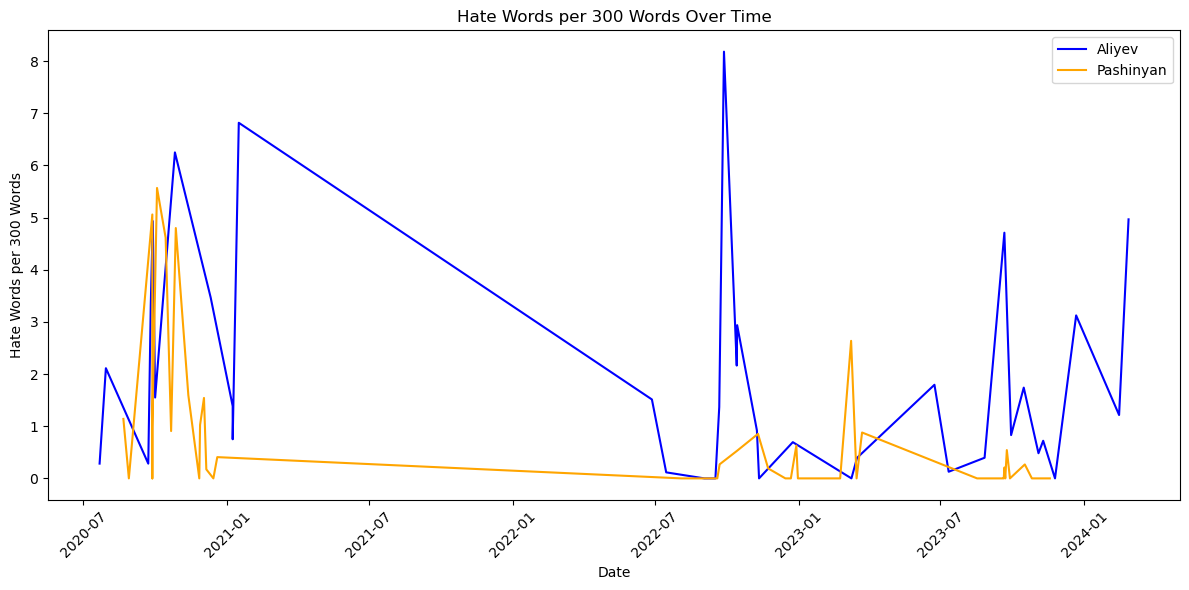

In [38]:
#Ensuring that the 'Date' column is in datetime format, for some reason I had an issue here even though I made the change earlier
df_a['Date'] = pd.to_datetime(df_a['Date'], errors='coerce')  #the 'coerce' part here will handle invalid dates
df_p['Date'] = pd.to_datetime(df_p['Date'], errors='coerce')

#Dropping any rows where 'Date' is NaT (Not a Time) after conversion
df_a = df_a.dropna(subset=['Date'])
df_p = df_p.dropna(subset=['Date'])

#Calculating hate words rate per 300 words for both leaders
df_a = calculate_hate_word_rate_300(df_a, hate_words)
df_p = calculate_hate_word_rate_300(df_p, hate_words)

#Plotting hate words per 300 words over time
plt.figure(figsize=(12, 6))

#Plot for Aliyev
df_a_sorted = df_a.sort_values('Date')
plt.plot(df_a_sorted['Date'], df_a_sorted['Hate Words per 300 Words'], label='Aliyev', color='blue')

#Plot for Pashinyan
df_p_sorted = df_p.sort_values('Date')
plt.plot(df_p_sorted['Date'], df_p_sorted['Hate Words per 300 Words'], label='Pashinyan', color='orange')

#Formatting the plot
plt.title('Hate Words per 300 Words Over Time')
plt.xlabel('Date')
plt.ylabel('Hate Words per 300 Words')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Not the cleanest graph, but one thing stands out to me - as the outlook for Armenia grows increasingly bleak over the course of the 3ish years in question, Pashinyan uses hate words less and less, probably in recognition of Armenia's ever weaker position vis-a-vis Azerbaijan. By the time of the Azerbaijani takeover of Karabakh, Aliyev is using hate words at a far higher clip than Pashinyan, likely perceiving he can act and speak with relative impunity.

Lastly, regarding their rhetorical strategies, I want to take a look at the metaphors Aliyev and Pashinyan use specifically associated with dehumanization and apocalyptic imagery. These are things I've especially noticed in the past when reading the things they've said, so I want to get a better sense of the broader picture here. The dehumanization metaphors, similar to the hate words above, serve to, well, dehumanize the other and justify violence against them. And the apocalyptic metaphors are often leveraged to inject a sense of gravity and urgency into the discourse, helping to raise the alarm and mobilize support/sentiment.

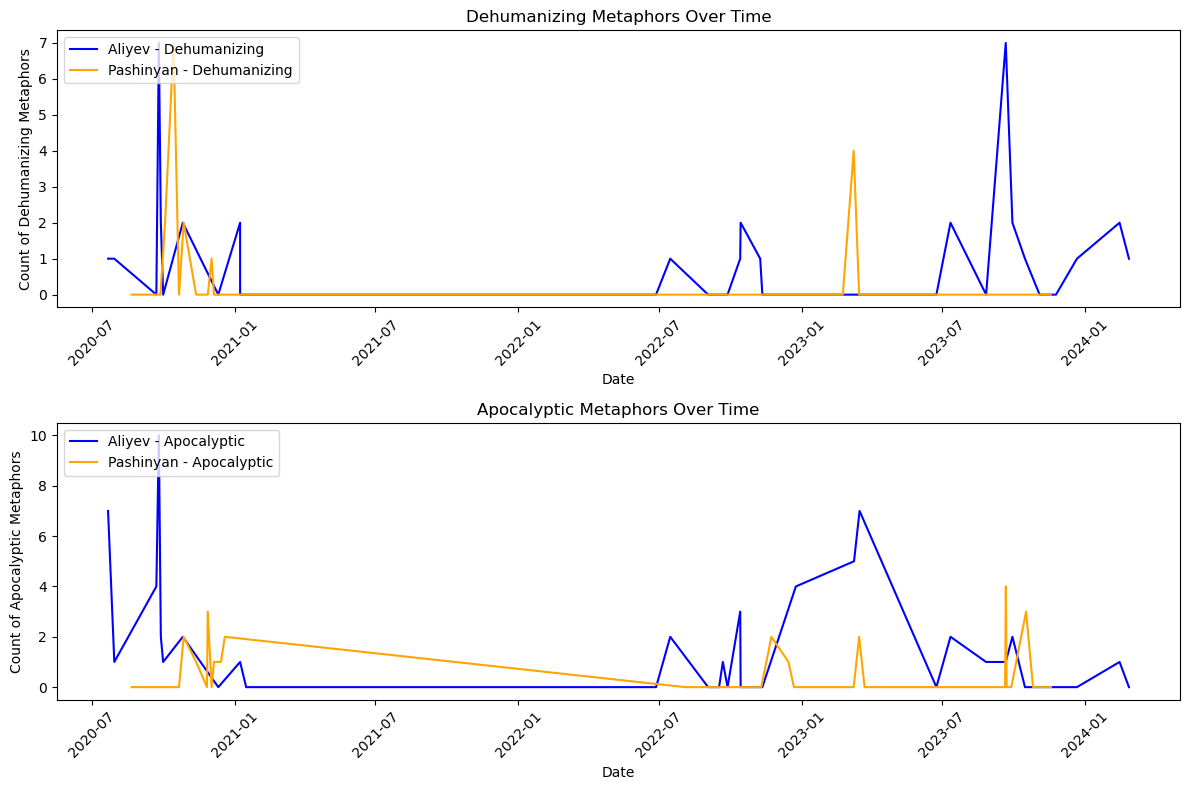

In [42]:
#Defining metaphor keywords
dehumanizing_metaphors = [
    'animal', 'beast', 'barbarian', 'brute', 'cancer', 'cockroach', 'creature', 'devil', 
    'disease', 'demon', 'filth', 'garbage', 'insect', 'killer', 'monster', 'moth', 'parasite', 
    'predator', 'reptile', 'scum', 'savage', 'snake', 'termite', 'terrorist', 'thug', 'vermin', 
    'vulture', 'virus', 'worm', 'zombie', 'undesirable', 'lowlife', 'rat', 'scavenger', 'filthy', 
    'plague', 'pest', 'trash', 'leech', 'rodent', 'pigs', 'swine', 'maggot', 'bacteria', 'cockroach', 
    'poison', 'hyena', 'hyenas', 'monkey', 'wolf', 'jackal', 'crocodile', 'mutant', 'roach', 'butcher', 
    'cattle', 'coward', 'scoundrel', 'beastly', 'grub', 'spawn', 'lice', 'reprobate', 'feral', 'uncivilized', 
    'undomesticated', 'rotten', 'unclean', 'pitiful'
]

#Defining apocalyptic keywords
apocalyptic_metaphors = [
    'end of the world', 'armageddon', 'cataclysm', 'doomsday', 'destruction', 'inferno', 
    'fall of civilization', 'final battle', 'judgment day', 'world collapse', 'dawn of destruction', 
    'fate of mankind', 'nightmare', 'hell on earth', 'final hour', 'reckoning', 'apocalypse', 
    'last days', 'global ruin', 'ruinous', 'the end', 'disaster', 'calamity', 'total annihilation', 
    'decay of society', 'world in ruins', 'end times', 'doomed', 'doom', 'desolation', 'chaos', 
    'collapse of order', 'last judgment', 'death toll', 'wrath of god', 'infernal', 'bloodbath', 
    'suffering', 'flood of destruction', 'cosmic disaster', 'obliteration', 'endgame', 'devastation', 
    'holocaust', 'the abyss', 'famine', 'extinction', 'the fall', 'mass extinction', 'total destruction', 
    'hellfire', 'conflagration', 'ruin', 'pandemic', 'collapse', 'devouring fire', 'war to end all wars', 
    'the reckoning', 'crumbling society', 'blow of fate', 'endless night', 'death knell', 'darkness ahead', 
    'final days', 'blackened sky', 'brink of extinction', 'world-ending', 'fatal end', 'oblivion', 
    'unavoidable fate', 'total devastation'
]

def count_metaphors(tokens, metaphor_list):
    """This is a function to count metaphor occurrences"""
    return sum(1 for word in tokens if word in metaphor_list)

def analyze_metaphors(df, dehumanizing_metaphors, apocalyptic_metaphors):
    """This is a function to refine analysis of metaphor occurrences"""
    df['Dehumanizing Metaphors'] = df['Tokens'].apply(lambda tokens: count_metaphors(tokens, dehumanizing_metaphors))
    
    df['Apocalyptic Metaphors'] = df['Tokens'].apply(lambda tokens: count_metaphors(tokens, apocalyptic_metaphors))
    
    return df

#Applying the function to both DataFrames (again, df_a for Aliyev, df_p for Pashinyan)
df_a = analyze_metaphors(df_a, dehumanizing_metaphors, apocalyptic_metaphors)
df_p = analyze_metaphors(df_p, dehumanizing_metaphors, apocalyptic_metaphors)

#Merging the two DataFrames for comparison
df_combined = pd.concat([df_a[['Date', 'Dehumanizing Metaphors', 'Apocalyptic Metaphors']], 
                         df_p[['Date', 'Dehumanizing Metaphors', 'Apocalyptic Metaphors']]], 
                        keys=['Aliyev', 'Pashinyan'])

#Sorting by date for better visualization
df_combined.sort_values(by='Date', inplace=True)

#Plotting the metaphors over time for both leaders
plt.figure(figsize=(12, 8))

#Plotting dehumanizing metaphors
plt.subplot(2, 1, 1)
plt.plot(df_a['Date'], df_a['Dehumanizing Metaphors'], label='Aliyev - Dehumanizing', color='blue')
plt.plot(df_p['Date'], df_p['Dehumanizing Metaphors'], label='Pashinyan - Dehumanizing', color='orange')
plt.title('Dehumanizing Metaphors Over Time')
plt.xlabel('Date')
plt.ylabel('Count of Dehumanizing Metaphors')
plt.legend(loc='upper left')
plt.xticks(rotation=45)

#Plotting apocalyptic metaphors
plt.subplot(2, 1, 2)
plt.plot(df_a['Date'], df_a['Apocalyptic Metaphors'], label='Aliyev - Apocalyptic', color='blue')
plt.plot(df_p['Date'], df_p['Apocalyptic Metaphors'], label='Pashinyan - Apocalyptic', color='orange')
plt.title('Apocalyptic Metaphors Over Time')
plt.xlabel('Date')
plt.ylabel('Count of Apocalyptic Metaphors')
plt.legend(loc='upper left')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

First, regarding the dehumanizing metaphors, while both Aliyev and Pashinyan use them fairly equally during the Second Nagorno-Karabakh War, later on in the conflict they're used almost exclusively by Aliyev. This tracks with the decrease over time in Pashinyan's use of hate words. Aliyev's use of dehumanizing metaphors seems to peak (or equal its peak) around the Azerbaijani takeover of Nagorno-Karabakh, so perhaps Aliyev upped his use of such rhetoric to help justify the explosion of violence in September 2023. It looks like the only time Pashinyan used dehumanizing rhetoric after 2020 was in early 2023, in the context of the worsening humanitarian crisis caused by the Lachin corridor blockade, as food, fuel, medicine, and other essential supplies could not reach the Armenians of Nagorno-Karabakh. Such inflammatory speech by Pashinyan then may have reflected the urgency and desperation of the situation. So again, we see Aliyev more frequently using dehumanizing metaphors in his rhetorical strategy.

As for the apocalyptic metaphors, it looks like early on in this timeframe, around the 2nd NK War, and indeed over the course of the whole period in question, Aliyev employed such speech more often than did Pashinyan. In the context of the 2nd NK War, this is likely because much of the justification for Azerbaijan's offensive(s) was rooted in the horrors Azerbaijan had experienced in the late 1980s and early 1990s when it lost the 1st NK War. Aliyev often spoke of the devastation wrought by Armenia and the mass suffering it caused. The only moment when Pashinyan clearly uses more such language is around the time of the lightning offensive in September 2023. As mentioned above, Pashinyan often warned that Azerbaijan was seeking to carry out ethnic cleansing and genocide during and after the offensive, and such warnings clearly track with rhetoric tinged with apocalytpic, existential undertones.

**Conclusion**

A clear takeaway from these data and analyses is that, from the 2nd NK War in 2020 to the September 2023 Azerbaijani lightning offensive and its aftermath, Ilham Aliyev far more frequently used hateful, dehumanizing rhetoric than did Nikol Pashinyan. While Pashinyan's use of such speech diminished over time and as Armenia continued to accumulate losses on the battlefield, Aliyev's use of inflammatory rhetoric either stayed consistent or even increased in moments. I expected Aliyev's use of such speech to decrease in frequency as Azerbaijan increasingly emerged as the clear victor and a sort of post-conflict phase began, in which one might expect such hateful speech to be less useful, but this plainly was not the case. Not surprisingly, many of the most popular hate words and phrases used by Aliyev and Pashinyan were rooted in historical narratives and grievances (e.g., Aliyev's referring to Karabakh Armenians as "occupiers"). Concerningly, hate speech appeared to be present in nearly all 84 speeches in this analysis. Future research that I would conduct would center on such hate speech and narratives ingrained in Armenian and Azerbaijani society, and how consistent those narratives are with the ones propagated by Aliyev and Pashinyan, for instance. Such information is critical for policymakers, scholars, and practitioners in the peacebuilding sphere - knowing what you're up against is often half the battle. Azerbaijan's September 2023 offensive marked the most definitive end to the conflict than at any other time since 1988. However, a formal peace agreement has yet to be signed, and there are fears on the Armenian side that Azerbaijan may once again resume its attacks, especially on Armenia's southern Syunik province. In the meantime, it will continue to be vitally important to track the hate narratives so often used over the course of this conflict.